# Data Cleaning in R

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Diagnose-the-Data" data-toc-modified-id="Diagnose-the-Data-2">Diagnose the Data</a></span></li><li><span><a href="#Dealing-with-Multiple-Files" data-toc-modified-id="Dealing-with-Multiple-Files-3">Dealing with Multiple Files</a></span></li><li><span><a href="#Reshaping-Data" data-toc-modified-id="Reshaping-Data-4">Reshaping Data</a></span></li><li><span><a href="#Dealing-with-Duplicates" data-toc-modified-id="Dealing-with-Duplicates-5">Dealing with Duplicates</a></span></li><li><span><a href="#Splitting-By-Index" data-toc-modified-id="Splitting-By-Index-6">Splitting By Index</a></span></li><li><span><a href="#Splitting-By-Character" data-toc-modified-id="Splitting-By-Character-7">Splitting By Character</a></span></li><li><span><a href="#Looking-at-Data-Types" data-toc-modified-id="Looking-at-Data-Types-8">Looking at Data Types</a></span></li><li><span><a href="#String-Parsing" data-toc-modified-id="String-Parsing-9">String Parsing</a></span></li></ul></div>

### Introduction

When we receive raw data, we have to do a number of things before we’re ready to analyze it, possibly including:
* diagnosing the “tidiness” of the data — how much data cleaning we will have to do  
* reshaping the data — getting the right rows and columns for effective analysis  
* combining multiple files  
* changing the types of values — how we fix a column where numerical values are stored as strings, for example  
* dropping or filling missing values - how we deal with data that is incomplete or missing  
* manipulating strings to represent the data better

### Diagnose the Data

For data to be tidy, it must have:
* Each variable as a separate row  
* Each row as a separate observation

The functions we often use to diagnose a dataset for cleaning:
      
Function | Use
:--------|:---
head() | display the first 6 rows of a table
summary() | display the summary statistics of a table
colnames() | display the column names of a table
nrow() | returns the number of rows in a data frame
count(df, column) | returns a table with counts of the unique values in the named column
table() | takes any R object as an argument and returns a table with the counts of each unique value in the argument

### Dealing with Multiple Files

Suppose you have several files following the filename structure: `file_1.csv`, `file_2.csv`, and so on. You want to get all of the relevant information into one table so that you can analyze the aggregate data.

You can combine the base R functions `list.files()` and `lapply()` with readr and dplyr to organize this data better.

```r
files <- list.files(pattern = "file_.*csv")
df_list <- lapply(files,read_csv)
df <- bind_rows(df_list)
```
* The first line uses `list.files()` and a regular expression, to find any file in the current directory that starts with `'file_'` and has an extension of `csv`, storing the name of each file in a vector `files`<br><br>

* The second line uses `lapply()` to read each file in `files` into a data frame with `read_csv()`, storing the data frames in `df_list`<br><br>

* The third line then concatenates all of those data frames together with dplyr’s `bind_rows()` function

### Reshaping Data

To reshape a table:

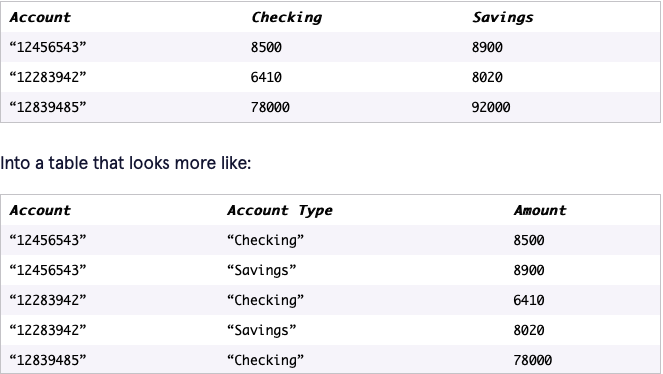

tidyr's `gather()` function takes a data frame and the columns to unpack

```r
df %>% gather('Checking', 'Savings', key='Account Type', value='Amount')
```
* `df:` the data frame which is piped into `gather()`<br><br>
* `Checking` and `Savings`: the columns of the old data frame that you want to turn into variables<br><br>
* `key`: the column name of the new data frame that stores the variables<br><br>
* `value`: the column name of the new data frame that stores the values

### Dealing with Duplicates

The base R function `duplicated()` returns a logical vector telling us which rows are duplicate rows.

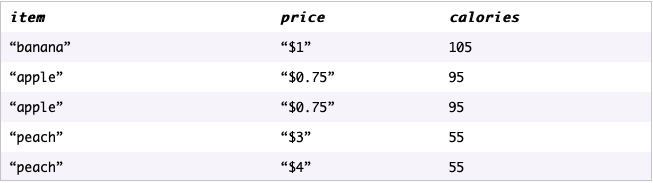

Checking the above data frame 'fruits' for duplicates:
```r
fruits %>% duplicated()
```
will return the following vector:
```r
[1] FALSE FALSE TRUE FALSE FALSE
```

To remove all rows of the data frame 'fruits' that are duplicates of another row:
```r
fruits %>% distinct()
```
This will remove the third row, which is a duplicate of the second row, in the above table.


To remove every row with a duplicate value in the `item` column:
```r
fruits %>% distinct(item,.keep_all = TRUE)
```
By default, this keeps the first occurrence of the duplicate. Therefore, rows three and five in the above table, will be removed.

### Splitting By Index

We can easily break data into separate columns by splitting the strings into substrings using `str_sub()` from the `stringr package:`

**Create new columns for `month`, `day`, `year` using data from the `birthday` column.**

<i>Create the 'month' column:</i>
```r
df %>% mutate(month = str_sub(birthday,1,2))
```
<i>Create the 'day' column:</i>
```r
df %>% mutate(day = str_sub(birthday,3,4))
```
<i>Create the 'year' column:</i>
```r
df %>% mutate(year = str_sub(birthday,5))
```
* The first command takes the characters starting at index 1 and ending at index 2 of each value in the birthday column and puts it into a month column and so on for the other command lines.

<i>**Resulting table:**</i>
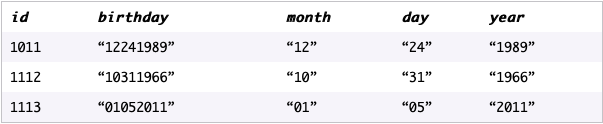

### Splitting By Character

**Create the `user_type` and `country` columns using data from the `type` column.**

<i>We can use the `tidyr` function, `separate()`, to split the `type` column into two separate columns</i>
```r
df %>% separate(type, c('user_type', 'country'), '_')
```
* `type` is the column to split
* `c('user_type', 'country')` is a vector with the names of the two new columns
* `'_'` is the character to split on

<i>**Resulting table:**</i>
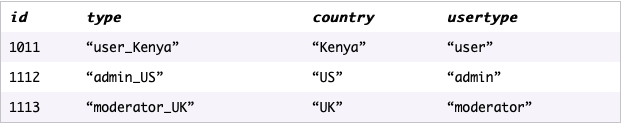

### Looking at Data Types

Each column of a data frame can hold items of the same data type.

`str()` displays the internal structure of an R object. Calling `str()` with a data frame as an argument will return a variety of information, including the data types. 

<i>Data frame:</i>
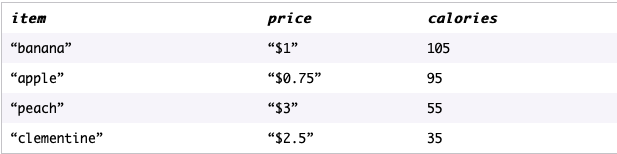

<i>Data types in the above data frame:</i>
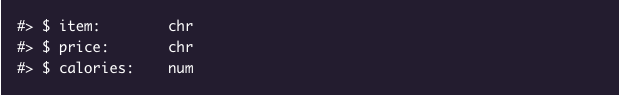

### String Parsing

**Convert character strings in a dataset to numeric data type**

First, we use a regular expression, in the base R function `gsub()` to remove the `$` from the `price` column, replacing the symbol with an empty string `''`:

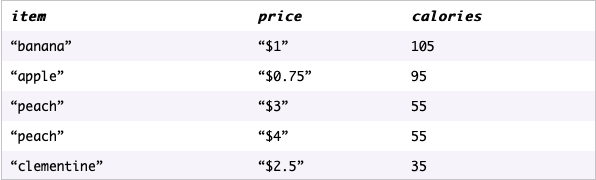
```r
fruit %>% mutate(price = gsub('\\$','',price))
```

We then use the base R function `as.numeric()` to convert character strings containing numeric values to numeric:
```r
fruit %>% mutate(price = as.numeric(price))
```
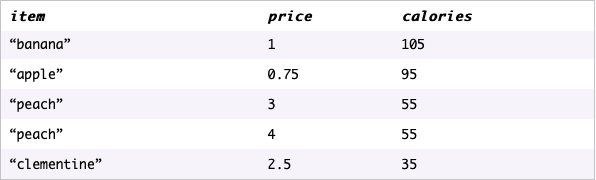